In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam


200

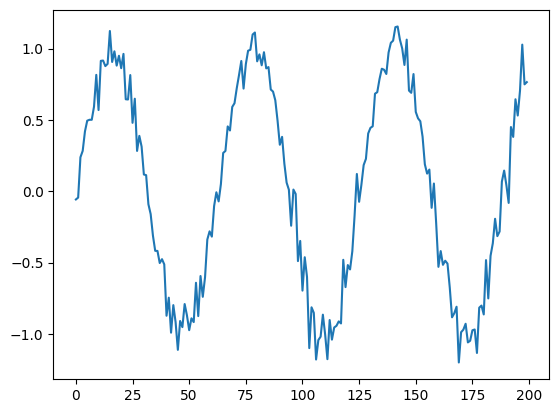

In [31]:

series=np.sin(0.1*np.arange(200))+np.random.randn(200)*0.1
plt.plot(series)
len(series)

In [32]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T)#data should be N*T
Y=np.array(Y)
N=len(X)
print(X.shape,Y.shape)


(190, 10) (190,)


In [34]:

# auotregression linearmodel
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.01)

)

In [43]:
#training the model

r=model.fit(X[:-N//2],Y[:-N//2],validation_data=(X[:-N//2],Y[:-N//2]),epochs=80)

Epoch 1/80
3/3 [==============================] - 0s 39ms/step - loss: 0.1626 - val_loss: 0.1610
Epoch 2/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1602 - val_loss: 0.1587
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1580 - val_loss: 0.1565
Epoch 4/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1558 - val_loss: 0.1542
Epoch 5/80
3/3 [==============================] - 0s 26ms/step - loss: 0.1534 - val_loss: 0.1520
Epoch 6/80
3/3 [==============================] - 0s 15ms/step - loss: 0.1514 - val_loss: 0.1498
Epoch 7/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1491 - val_loss: 0.1477
Epoch 8/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1470 - val_loss: 0.1456
Epoch 9/80
3/3 [==============================] - 0s 26ms/step - loss: 0.1449 - val_loss: 0.1435
Epoch 10/80
3/3 [==============================] - 0s 19ms/step - loss: 0.1429 - val_loss: 0.1414
Epoch 11/80
3/3 [============

6/6 [==============================] - 0s 2ms/step


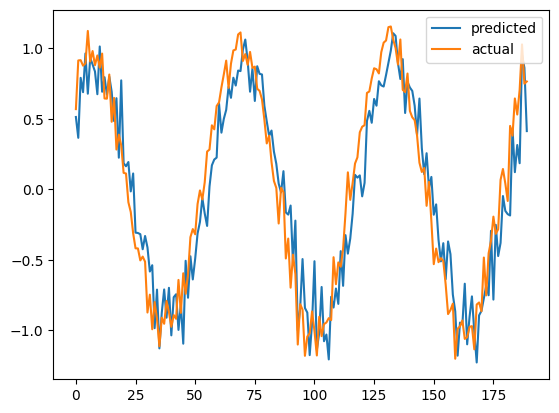

In [44]:
output=model.predict(X)
plt.plot(output,label="predicted")
plt.plot(Y,label="actual")
plt.legend()

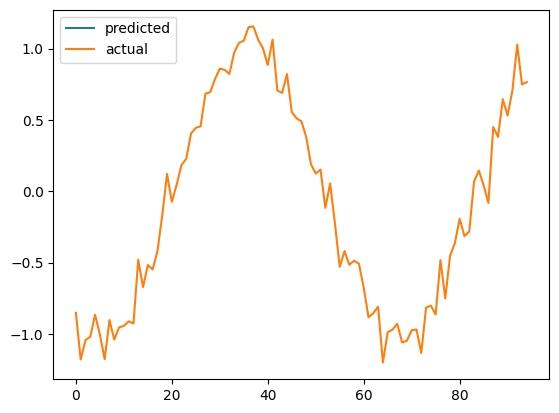

In [45]:
#incorrect method to  forecast using true target
validation_target=Y[-N//2:]
validation_predict=[]
#last train input
last_x=X[-N//2]
while len(validation_predict)<len(validation_predict):#scalar
 p=model.predict(X[i].reshape(1,-1))[0,0]#model.predict returns NXk output where N=1,K=1
 i+=1
 validation_predict.append(p)

plt.plot(validation_predict,label="predicted")
plt.plot(validation_target,label="actual")
plt.legend()

In [46]:
#correct way to forecast
#forecast future values (use only self predictions for the making future predictions)
validation_target=Y[-N//2:]
validation_predict=[]
#last train input
last_x=X[-N//2]
while len(validation_predict)<len(validation_predict):
  #update the prediction_list
  validation_predict.append(p)
  #make the new input
  last_x=np.roll(last_x,-1)#shifts below everytime that 
  last_x[-1]=p

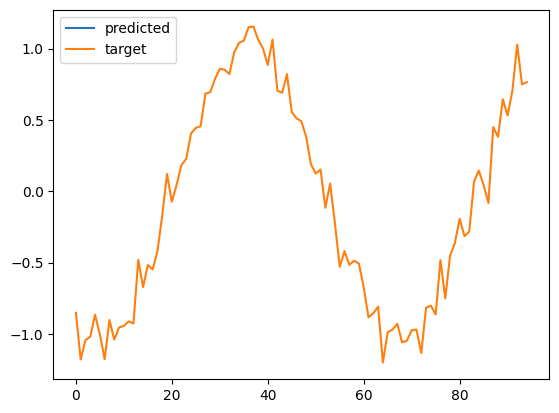

In [47]:
plt.plot(validation_predict,label="predicted")
plt.plot(validation_target,label="target")
plt.legend()

In [48]:
array = np.array([1, 2, 3, 4, 5])
shifted_array = np.roll(array, 2)

print(shifted_array)

[4 5 1 2 3]
